In [203]:
import matplotlib.pyplot as plt
import numpy as np
import math 

In [204]:
mx = 0
sigma_u = 4*10
sigma_delta = 0
u_true = 110
delta_true = 270
delta_t = 1
size = int(3600 * 1.9)
list_delta = [0.0/size for i in range(0,size,delta_t)] 
list_u = [0.0/size for i in range(0,size,delta_t)]

Блок переменных для расчета истинных значений

In [205]:
s = 846.15
v = 389
psi_p = 230*math.pi/180
X = 615.38
Y = 576.92
psi_i = 220*math.pi/180
w = 446.15

Искомые значения

In [206]:
w_x = list()
w_y = list()
x = list()
y = list()
w_x_true = list()
w_y_true = list()
x_true = list()
y_true = list()
delta_S = list()

Расчет измеренных значений

In [207]:
for i in range (0,size,delta_t):
    du_c = np.random.normal(mx, sigma_u)
    ddelta_c = np.random.normal(mx, sigma_delta)
    list_u[i] = du_c + u_true
    list_delta[i] = ddelta_c + delta_true

In [208]:
to_rad = math.pi/180

In [209]:
x.append(0)
y.append(0)
x_true.append(0)
y_true.append(0)
for t in range(0,size,delta_t):
    w_x_true.append(v*math.sin(psi_i) + u_true*math.sin(delta_true*to_rad))
    w_y_true.append(v*math.cos(psi_i) + u_true*math.cos(delta_true*to_rad))
    w_x.append(v*math.sin(psi_i) + list_u[t]*math.sin(list_delta[t]*to_rad))
    w_y.append(v*math.cos(psi_i) + list_u[t]*math.cos(list_delta[t]*to_rad))
    if (t > 0):
        x.append(x[t-1]+w_x[t]*delta_t)
        y.append(y[t-1]+w_y[t]*delta_t)
        x_true.append(x_true[t-1]+w_x_true[t]*delta_t)
        y_true.append(y_true[t-1]+w_y_true[t]*delta_t)
        delta_S.append(math.sqrt((x[t]-x_true[t])**2 + (y[t]-y_true[t])**2))

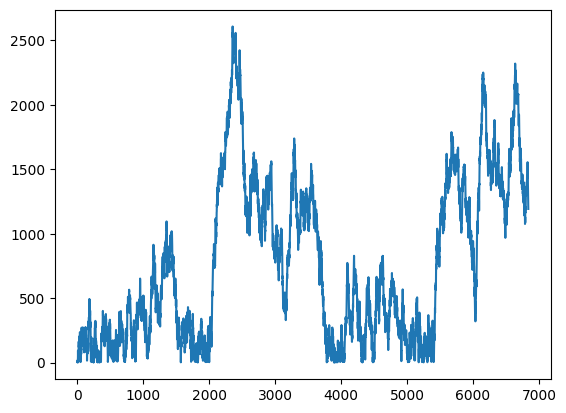

In [210]:
plt.plot(delta_S)